In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

### Import Data File

In [40]:
Accepted = pd.read_csv('Accepted.csv')

In [41]:
fontTitle = {'family': 'serif',
       'color': 'navy',
       'weight': 'bold',
       'size': 24}
fontLabel = {'family': 'serif',
       'color': 'navy',
       'weight': 'normal',
       'size': 16}

### Change Grades back to A thru G

In [42]:
Accepted['grade']=Accepted.grade.map({1:'A', 2:'B', 3:'C', 4:'D', 5:'E', 6:'F', 7:'G'})

### Loan Grade Count Graph

In [43]:
grade_counts =Accepted["grade"].value_counts()
x= ['A', 'B', 'C', 'D', 'E', 'F', 'G']
count = []
for i in range(0,7):
    count.append(grade_counts[x[i]])

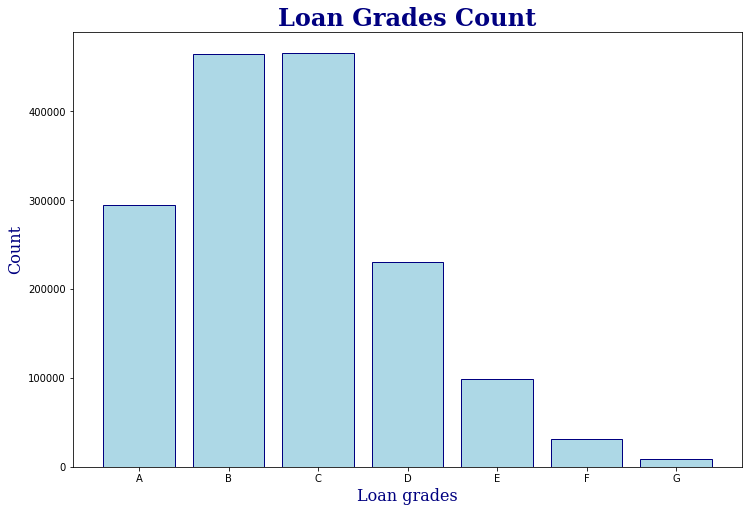

In [44]:
fig, ax = plt.subplots(figsize = (12,8))
ax.bar(x, count,edgecolor = 'navy', color = 'lightblue' )
ax.set_xlabel("Loan grades", fontdict= fontLabel)
ax.set_ylabel("Count", fontdict = fontLabel)
ax.set_title("Loan Grades Count", fontdict = fontTitle)
plt.show()

### Purpose for Loan Graph

In [46]:
purpose_counts = [
    Accepted["purpose_debt_consolidation"].sum(),
    Accepted["purpose_credit_card"].sum(),
    Accepted["purpose_home_improvement"].sum(),
    Accepted["purpose_other"].sum(),
    Accepted["purpose_major_purchase"].sum(),
    Accepted["purpose_medical"].sum(),
    Accepted["purpose_small_business"].sum(),
    Accepted["purpose_vacation"].sum(),
    Accepted["purpose_moving"].sum(),
    Accepted["purpose_house"].sum(),
    Accepted["purpose_renewable_energy"].sum(),
    Accepted["purpose_wedding"].sum(),
    Accepted["purpose_educational"].sum()]
purpose_countsX = ["debt_consolidation", "credit_card", "home_improvement",
                   "other", "major_purchase", "medical", "small_business", 
                   "vacation", "moving", "house", "renewable_energy",
                  "wedding", "educational"]

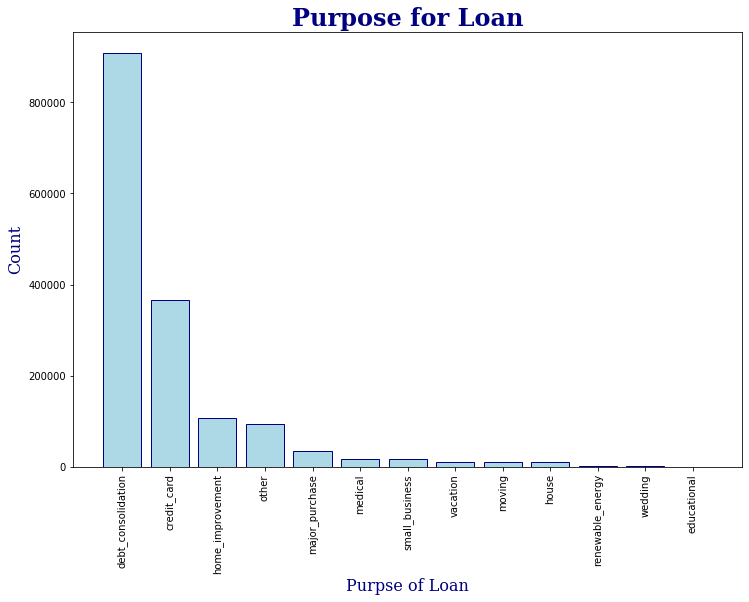

In [47]:
fig, ax = plt.subplots(figsize = (12,8))
plt.bar(purpose_countsX, purpose_counts, edgecolor = 'navy', color = 'lightblue')
ax.set_xlabel("Purpse of Loan", fontdict = fontLabel)
ax.set_ylabel("Count", fontdict = fontLabel)
ax.set_title("Purpose for Loan", fontdict = fontTitle)
plt.xticks(rotation = 90)
plt.show()

### Create a New Data Frame Grouped by Grade

In [48]:
Accepted_grades = Accepted.groupby(['grade']).mean()

In [49]:
Accepted_grades.head()

,loan_amnt,term,emp_length,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,revol_bal,total_rec_prncp,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
grade,,,,,,,,,,,,,,,,,,,,,
A,14820.634934,37.325826,6.152424,96231.049289,16.004552,0.183704,730.739406,0.403170,18326.922798,10100.586518,...,0.006037,0.024640,0.008674,0.003247,0.041250,0.000315,0.005851,0.005146,0.000153,0.788293
B,14153.786266,40.484009,6.091584,83306.807078,17.624266,0.318942,702.513730,0.527498,16408.078621,9765.949961,...,0.005018,0.021735,0.010041,0.004765,0.048764,0.000409,0.006555,0.006346,0.000192,0.694688
C,15049.912980,44.544865,6.039084,78637.216645,19.035676,0.357913,692.580321,0.652993,16169.822254,9673.883496,...,0.005668,0.020921,0.012257,0.007202,0.062635,0.000643,0.010108,0.007699,0.000307,0.700602
D,15888.679388,46.650016,6.028580,75257.142724,20.396903,0.373060,687.626122,0.792294,15760.425772,9733.750107,...,0.007975,0.021073,0.014210,0.009961,0.079064,0.000939,0.015850,0.008165,0.001082,0.619260
E,17792.644838,51.585585,6.075381,75292.779381,21.164397,0.369294,686.231030,0.913072,16557.711683,10812.888339,...,0.010198,0.019960,0.013006,0.010918,0.081160,0.000993,0.021532,0.006751,0.001034,0.548958


### Plot Average Annual Income

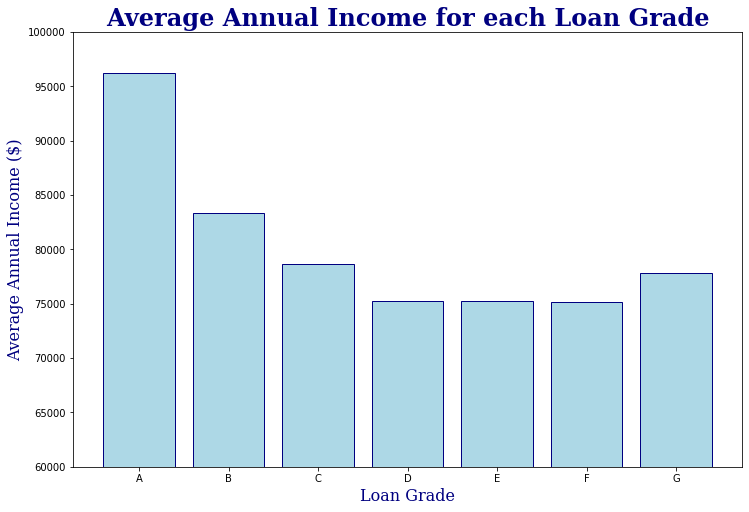

In [50]:
fig, ax = plt.subplots(figsize = (12,8))
ax.bar(Accepted_grades.index, Accepted_grades["annual_inc"], edgecolor = 'navy', color = 'lightblue')
ax.set_xlabel("Loan Grade", fontdict = fontLabel)
ax.set_ylabel("Average Annual Income ($)", fontdict = fontLabel)
ax.set_title("Average Annual Income for each Loan Grade", fontdict = fontTitle)
ax.set_ylim([60000, 100000])
plt.show()

### Plot Average FICO score

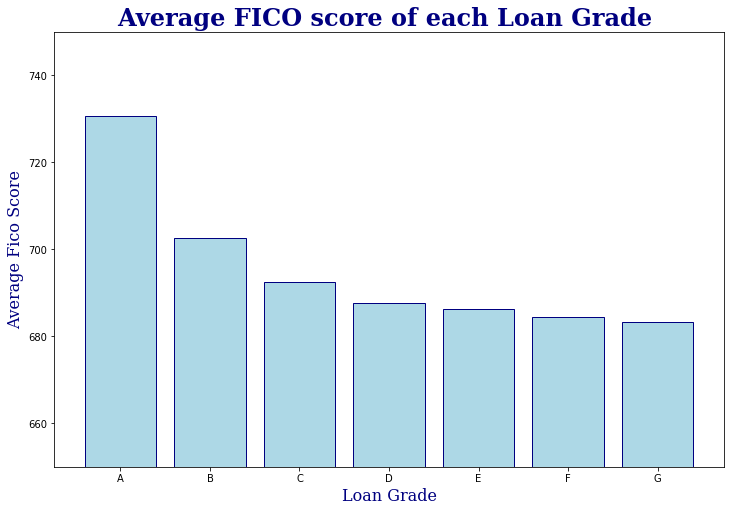

In [51]:
fig, ax = plt.subplots(figsize = (12,8))
plt.bar(Accepted_grades.index, Accepted_grades["fico_range_high"], edgecolor = 'navy', color = 'lightblue')
ax.set_xlabel("Loan Grade", fontdict = fontLabel)
ax.set_ylabel("Average Fico Score", fontdict = fontLabel)
ax.set_title("Average FICO score of each Loan Grade ", fontdict = fontTitle)
ax.set_ylim([650, 750])

plt.show()

### Plot Debt to Income Ratio 

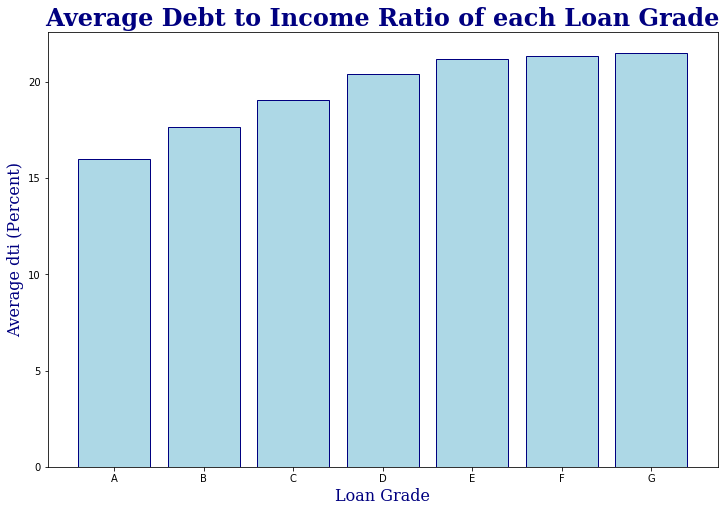

In [52]:
fig, ax = plt.subplots(figsize = (12,8))
plt.bar(Accepted_grades.index, Accepted_grades["dti"],edgecolor = 'navy', color = 'lightblue')
ax.set_xlabel("Loan Grade", fontdict = fontLabel)
ax.set_ylabel("Average dti (Percent)", fontLabel)
ax.set_title("Average Debt to Income Ratio of each Loan Grade", fontTitle)


plt.show()

### Plot Loan Term by Loan Count

In [53]:
Accepted_gradesTerm = Accepted
Accepted_gradesTerm['gradeTerm'] = Accepted_gradesTerm['grade'] + Accepted_gradesTerm['term'].astype(str)

In [54]:
GradeTerms = Accepted_gradesTerm['gradeTerm'].value_counts()
xGradeTerms= ['A36', 'B36', 'C36', 'D36', 'E36', 'F36', 'G36','A60', 'B60', 'C60', 'D60', 'E60', 'F60', 'G60']
GTcount = []
for i in range(0,14):
    GTcount.append(GradeTerms[xGradeTerms[i]])

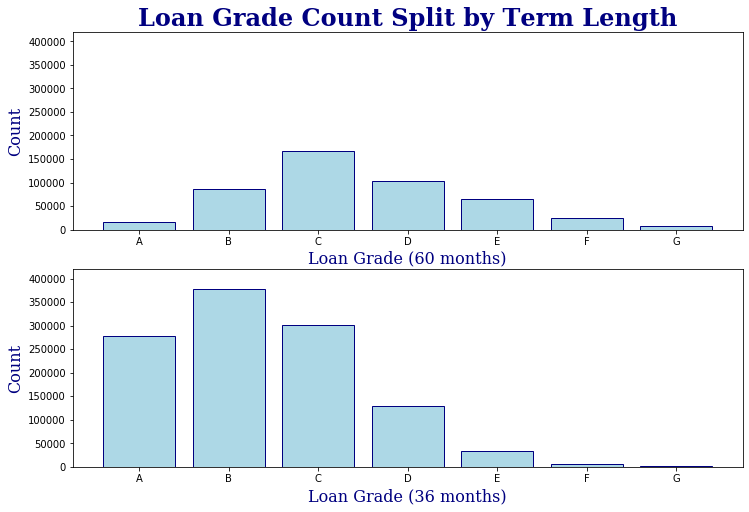

In [56]:
fig, ax = plt.subplots(2,1,figsize = (12,8))
ax[1].bar(['A', 'B', 'C', 'D', 'E', 'F', 'G'], GTcount[0:7],edgecolor = 'navy', color = 'lightblue')
ax[1].set_xlabel("Loan Grade (36 months)", fontdict = fontLabel)
ax[1].set_ylabel("Count", fontdict = fontLabel)
ax[1].set_ylim(0, 420000)

ax[0].bar(['A', 'B', 'C', 'D', 'E', 'F', 'G'], GTcount[7:14], edgecolor = 'navy', color = 'lightblue')
ax[0].set_ylim(0, 420000)
ax[0].set_xlabel("Loan Grade (60 months)", fontdict = fontLabel)
ax[0].set_ylabel("Count", fontdict = fontLabel)
ax[0].set_title("Loan Grade Count Split by Term Length",fontdict = fontTitle)
plt.show()